#                                     Chocolate Data Project

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\hp\Downloads\CHOCOLATEDATAAA.xlsx')

In [3]:
df.shape

(300, 7)

In [160]:
df.head

<bound method NDFrame.head of         Sales Person    Geography               Product  Amount  Units  \
0         Ram Mahesh  New Zealand        70% Dark Bites    1624    114   
1        Brien Boise          USA  Choco Coated Almonds    6706    459   
2       Husein Augar          USA          Almond Choco     959    147   
3       Carla Molina       Canada         Drinking Coco    9632    288   
4     Curtice Advani           UK            White Choc    2100    414   
..               ...          ...                   ...     ...    ...   
295  Gunar Cockshoot  New Zealand          Almond Choco     938    366   
296  Gunar Cockshoot    Australia   Baker's Choco Chips    8841    303   
297     Barr Faughny           UK   Peanut Butter Cubes    4018    126   
298     Carla Molina  New Zealand       Raspberry Choco     714    231   
299     Husein Augar    Australia            White Choc    3850    102   

     Cost per Unit     Cost  
0            14.49  1651.86  
1             8.65  3

In [161]:
pd.isnull(df) #Find null values

,Sales Person,Geography,Product,Amount,Units,Cost per Unit,Cost
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   300 non-null    object 
 1   Geography      300 non-null    object 
 2   Product        300 non-null    object 
 3   Amount         300 non-null    int64  
 4   Units          300 non-null    int64  
 5   Cost per Unit  300 non-null    float64
 6   Cost           300 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 16.5+ KB


In [165]:
pd.isnull(df).sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
Cost per Unit    0
Cost             0
dtype: int64

In [166]:
df.dropna(inplace=True) #dropping null values

In [167]:
pd.isnull(df).sum() #updated data

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
Cost per Unit    0
Cost             0
dtype: int64

In [168]:
df.describe()

,Amount,Units,Cost per Unit,Cost
count,300.000000,300.000000,300.000000,300.000000
mean,4136.230000,152.200000,9.474233,1465.679100
std,3124.832629,118.099499,3.446079,1363.668331
min,0.000000,0.000000,3.110000,0.000000
25%,1652.000000,54.000000,6.490000,487.087500
50%,3437.000000,124.500000,9.330000,1079.235000
75%,6179.250000,220.500000,11.767500,2016.787500
max,16184.000000,525.000000,16.730000,8682.870000


In [169]:
df.columns

Index(['Sales Person', 'Geography', 'Product', 'Amount', 'Units',
       'Cost per Unit', 'Cost'],
      dtype='object')

In [170]:
print(df.dtypes) #check datatypes

Sales Person      object
Geography         object
Product           object
Amount             int64
Units              int64
Cost per Unit    float64
Cost             float64
dtype: object


In [171]:
a = str('Sales Person')           #test converting dtypes
print("after conversion",type(a))

after conversion <class 'str'>


In [172]:
print(type('Sales Person'))      #dtypes converted

<class 'str'>


In [173]:
print(df.dtypes)                #didnt save 

Sales Person      object
Geography         object
Product           object
Amount             int64
Units              int64
Cost per Unit    float64
Cost             float64
dtype: object


In [174]:
df.columns  #check column names

Index(['Sales Person', 'Geography', 'Product', 'Amount', 'Units',
       'Cost per Unit', 'Cost'],
      dtype='object')

# Total Units Sold

In [175]:
df['Units'].sum() #total units sold

45660

# Total Profit

In [16]:
x = df['Amount'].sum()         #total Profit
y = df['Cost'].sum()
print(x-y)

801165.27


# Find Country with highest sale by amount

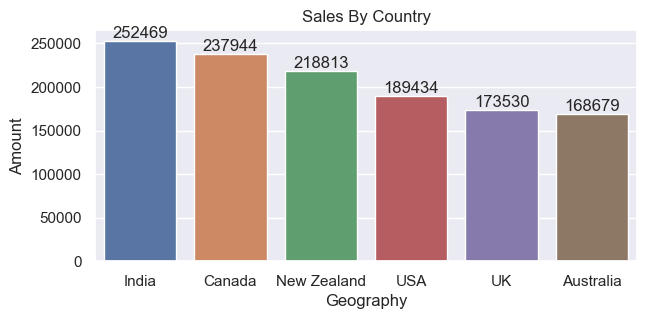

In [10]:
sales = df.groupby(['Geography'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #highest sale by geography
ax = sns.barplot(x = 'Geography', y ='Amount', data = sales)
ax.bar_label(ax.containers[0])
plt.title("Sales By Country")
sns.set(rc={'figure.figsize':(7.5,3)})


# How many units sold by each sales person

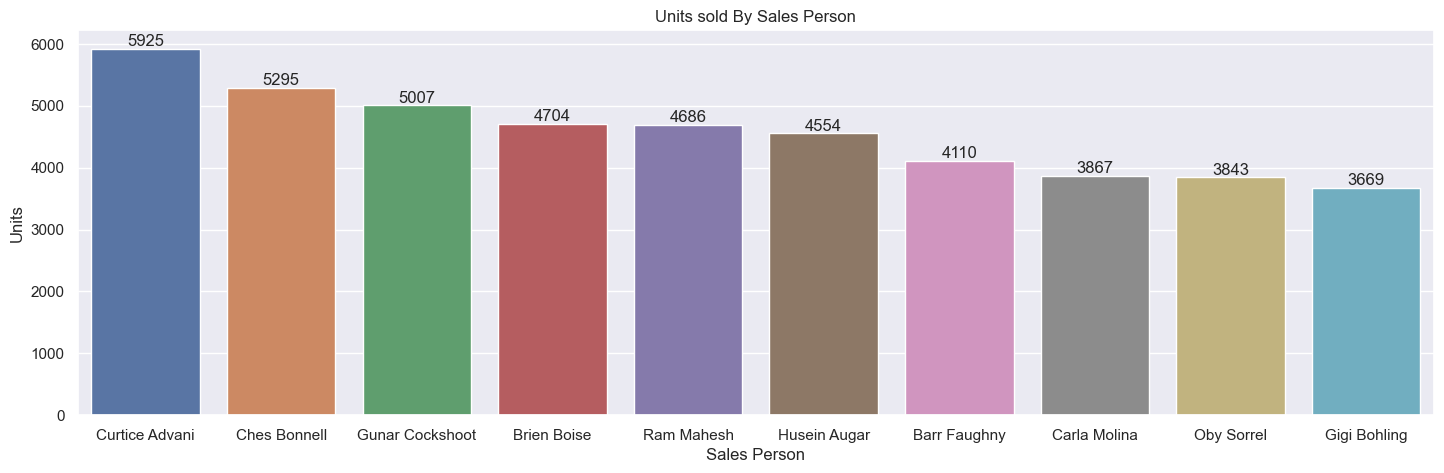

In [190]:
gb = df.groupby('Sales Person',as_index=False).agg({'Units':'sum'}).sort_values(by = 'Units', ascending = False)
ax = sns.barplot(x = 'Sales Person', y = 'Units', data = gb)
ax.bar_label(ax.containers[0])
plt.title('Units sold By Sales Person')
sns.set(rc={'figure.figsize':(17.5,5)})

# Find top 10 units sold by sales person on the basis of country.

[Text(0, 0, '1585'),
 Text(0, 0, '1518'),
 Text(0, 0, '1373'),
 Text(0, 0, '1482'),
 Text(0, 0, '1329'),
 Text(0, 0, '1182')]

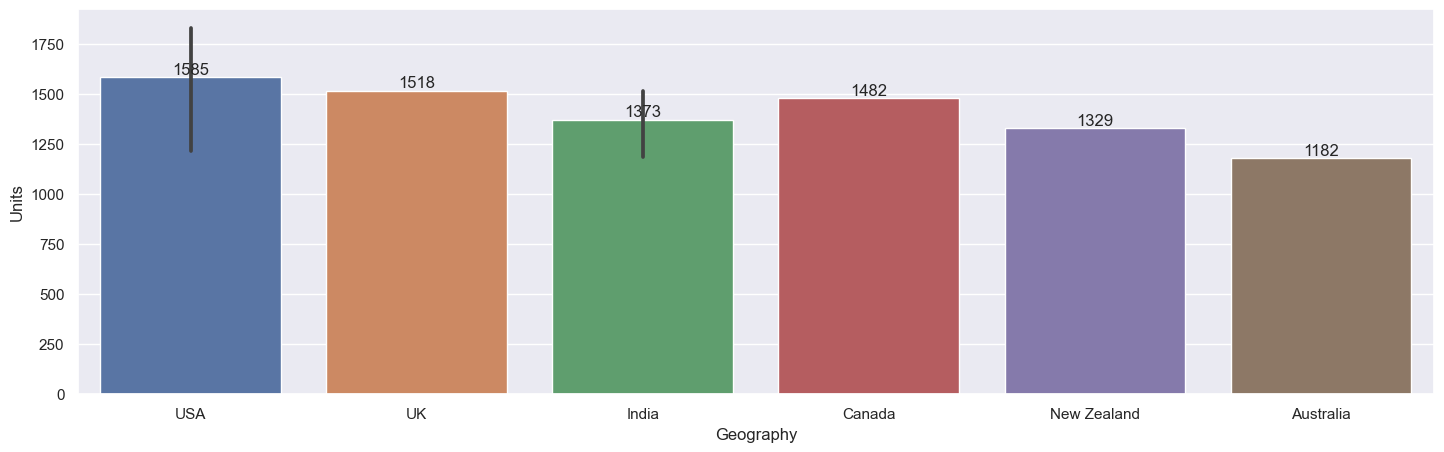

In [179]:
gb = df.groupby(['Sales Person','Geography'],as_index=False).agg({'Units':'sum'}).sort_values(by='Units', ascending = False).head(10)
ax = sns.barplot(x= 'Geography', y = 'Units', data = gb)
ax.bar_label(ax.containers[0])


In [180]:
df['Units'] = df['Units'].astype('float')

In [181]:
df['Units'].dtype

dtype('float64')

# Find 3 Highest Selling Product by Units

Text(0.5, 1.0, 'Top 3 Highest Selling Products')

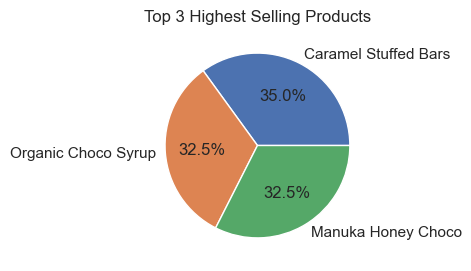

In [32]:
gb = df.groupby("Product",as_index=False).agg({"Units":"sum"}).sort_values(by ='Units' , ascending = False).head(3)  #units sold by products
plt.pie(gb["Units"],labels=gb["Product"],autopct='%1.1f%%')
plt.title("Top 3 Highest Selling Products")